In [1]:
from importlib import reload
import sys

src_path =   '../src' # change as needed
sys.path.insert(0,src_path)

max_length = 128

train = True
debias = True

In [2]:
import data_generator;reload(data_generator)

train_data, val_data, test_data = data_generator.GetData(max_length, sample=50000)

INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/bert_cased_L-12_H-768_A-12/1'.
INFO:absl:Downloading https://tfhub.dev/google/bert_cased_L-12_H-768_A-12/1: 191.62MB
INFO:absl:Downloading https://tfhub.dev/google/bert_cased_L-12_H-768_A-12/1: 371.62MB
INFO:absl:Downloaded https://tfhub.dev/google/bert_cased_L-12_H-768_A-12/1, Total size: 417.36MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/bert_cased_L-12_H-768_A-12/1'.
100%|██████████| 150000/150000 [00:47<00:00, 3131.69it/s]


        tag  cat  occurences
0    B-MISC    0         333
1     I-LOC    1      125808
2    I-MISC    2       52182
3     I-ORG    3       90601
4     I-PER    4      413873
5         O    5     2620281
6  [nerCLS]    6      150000
7  [nerPAD]    7    14787985
8  [nerSEP]    8      150000
9    [nerX]    9      808937

                tag  cat  occurences
0  AFRICAN-AMERICAN    0       74886
1          EUROPEAN    1       75114
2         [raceCLS]    2      150000
3         [racePAD]    3    14787985
4         [raceSEP]    4      150000
5           [raceX]    5     3962015

           tag  cat  occurences
0       FEMALE    0       74749
1         MALE    1       75251
2  [genderCLS]    2      150000
3  [genderPAD]    3    14787985
4  [genderSEP]    4      150000
5    [genderX]    5     3962015



In [3]:
import model_utils; reload(model_utils)

model = model_utils.NER(max_length)
    
model.generate(bert_train_layers=4)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 128)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 128)]        0                                            
__________________________________________________________________________________________________
bert_layer (BertLayer)          (None, None, 768)    108931396   input_ids[0][0]                  
                                                                 input_masks[0][0]            

In [4]:
if train:
    model.fit(
        train_data,
        val_data,
        epochs=8,
        batch_size=32,
        debias=debias
    ) 


val_acc_ner: 0.99; val_acc_ner_non_other: 0.96;  val_acc_gender: 0.50; val_acc_race: 0.50



val_acc_ner: 0.99; val_acc_ner_non_other: 0.96;  val_acc_gender: 0.50; val_acc_race: 0.50



val_acc_ner: 0.99; val_acc_ner_non_other: 0.96;  val_acc_gender: 0.50; val_acc_race: 0.50



val_acc_ner: 0.99; val_acc_ner_non_other: 0.96;  val_acc_gender: 0.50; val_acc_race: 0.50



val_acc_ner: 0.99; val_acc_ner_non_other: 0.96;  val_acc_gender: 0.50; val_acc_race: 0.50



val_acc_ner: 0.99; val_acc_ner_non_other: 0.96;  val_acc_gender: 0.50; val_acc_race: 0.50



val_acc_ner: 0.99; val_acc_ner_non_other: 0.96;  val_acc_gender: 0.50; val_acc_race: 0.50



val_acc_ner: 0.99; val_acc_ner_non_other: 0.96;  val_acc_gender: 0.50; val_acc_race: 0.50



acc_ner: 0.99; acc_ner_non_other: 0.95


array([[     0,      0,     34,     60,      0,     34],
       [     0,  41029,   1230,   1118,    149,    187],
       [     0,    779,  11955,    395,    126,    875],
       [     0,   2252,    782,  31653,    560,   1429],
       [     0,    143,     78,    271, 147878,    732],
       [     0,    185,    633,    799,    486, 848260]], dtype=int32)

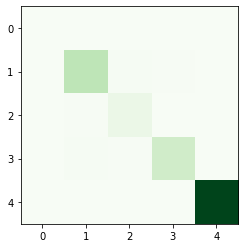

In [5]:
model.score(test_data)

In [6]:
bias = model.getBiasedPValues(test_data, num_iterations=10000)

In [7]:
bias

{'race': 0.06125,
 'gender': 0.3184,
 'race_test_statistic': 0.1079299717180695,
 'gender_test_statistic': -0.032621769241430565,
 'race_std': 0.06937372370686934,
 'gender_std': 0.06933698328805071,
 'race_effect_size': 0.37930828509027725,
 'gender_effect_size': -0.11464570175094553}